# Requisitos:
- Utilização de no máximo 20 questionamentos realizados na
pesquisa
- Utilizar 3 meses para construção da solução
- Caracterização dos sintomas clínicos da população
- Comportamento da população na época da COVID-19
- Características econômicas da Sociedade


# Quais perguntas responderemos?

Espectro financeiro da população:
- Renda média por estado
- Renda por area de atuação
- Renda vs comportamento na pandemia
- Renda vs escolaridade

Comportamento da população na época do covid:
- Isolamento
- Home office
- Tipo de domicílio
- Horas de trabalho por area de atuação

Questões de saúde:
- Count de exames positivos
- Exames positivos por horas semanais e area de atuação
- Busca por atendimento
- Internação
- Sintomas

# Características dos dados

- Fonte: https://covid19.ibge.gov.br/pnad-covid/
- Período: maio/2020 a julho/2020


# Importações das bases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dados = pd.read_csv('dados.csv', sep = ',')
df_dicionario = pd.read_csv('dicionario.csv', sep = ',')
df_colunas = pd.read_csv('nome_coluna.txt', sep = ',')


In [3]:
df_dados.columns

Index(['mes', 'sigla_uf', 'a003', 'a004', 'v1022', 'a005', 'a006', 'a006b',
       'c007d', 'c008', 'c013', 'c01011', 'c01012', 'b0011', 'b0012', 'b0019',
       'b002', 'b009b', 'b009d', 'b009f', 'b005', 'b011'],
      dtype='object')

# Modelagem

Aplicando as perguntas à base auxiliar

In [4]:
# Trazendo o nome das colunas para df_dicionario através do merge
df_dicionario = pd.merge(df_dicionario, df_colunas, left_on='nome_coluna', right_on='de', how='left')

#selecionando colunas
df_dicionario = df_dicionario[['nome_coluna', 'chave', 'valor', 'para']]

# renomeando colunas
df_dicionario.rename(columns={'para': 'questao'}, inplace=True)

Substituindo os códigos pelas perguntas

In [5]:
df_dados.columns

Index(['mes', 'sigla_uf', 'a003', 'a004', 'v1022', 'a005', 'a006', 'a006b',
       'c007d', 'c008', 'c013', 'c01011', 'c01012', 'b0011', 'b0012', 'b0019',
       'b002', 'b009b', 'b009d', 'b009f', 'b005', 'b011'],
      dtype='object')

In [6]:
# Mapeando nomes com base em um dicionário
mapeamento_colunas = dict(zip(df_colunas['de'], df_colunas['para']))

# Renomeia as colunas de df1 usando o dicionário
df_dados.rename(columns=mapeamento_colunas, inplace=True)

Substituindo valores pelas respostas

In [7]:
# Cria um dicionário para mapear os valores das colunas
mapping_dict = {}
for index, row in df_dicionario.iterrows():
  chave = row['chave']
  questao = row['questao']
  valor = row['valor']
  if questao not in mapping_dict:
    mapping_dict[questao] = {}
  mapping_dict[questao][chave] = valor

# Aplica o mapeamento para substituir os valores nas colunas do df_dados
for column in df_dados.columns:
  if column in mapping_dict:
    df_dados[column] = df_dados[column].map(mapping_dict[column])

In [8]:
# # Mostrando distintos em cada coluna
for coluna in df_dados.columns:
      print(f'Coluna: {coluna}')
      print(df_dados[coluna].unique())

Coluna: mes
[5 6 7]
Coluna: uf
['AP' 'DF' 'AC' 'RR' 'TO' 'MS' 'RN' 'PI' 'RO' 'PA' 'AM' 'SE' 'AL' 'CE'
 'PB' 'MT' 'ES' 'BA' 'GO' 'PR' 'MA' 'PE' 'RS' 'SP' 'SC' 'RJ' 'MG']
Coluna: sexo
['Homem' 'Mulher']
Coluna: raca_cor
['Parda' 'Preta' 'Branca' 'Amarela' 'Indígena' 'Ignorado']
Coluna: situacao_domicilio
['Urbana' 'Rural']
Coluna: escolaridade
['Fundamental incompleto' 'Médio completo' 'Médio incompleto'
 'Pós-graduação, mestrado ou doutorado' 'Superior incompleto'
 'Sem instrução' 'Superior completo' 'Fundamental completa']
Coluna: frequenta_escola
['Não aplicável' 'Não' 'Sim']
Coluna: aulas_presenciais
['Não aplicável']
Coluna: atividade_da_empresa
['Não aplicável' 'Comércio no atacado e varejo;'
 'Saúde humana e assistência social'
 'Serviço de alimentação (bares, restaurantes, ambulantes de alimentação)'
 'Bancos, atividades financeiras e de seguros' 'Construção' 'Outro'
 'Fornecimento de eletricidade e gás, água, esgoto e coleta de lixo'
 'Educação'
 'Serviço doméstico remunerado (s

In [9]:
# df_dados.info()

Constatamos que a coluna "aulas_presenciais" possui somente valores nulos, vamos descartá-la

In [10]:
# Entendimento das células
# df_dados['aulas_presenciais'].value_counts(normalize=True)

In [11]:
# Drop coluna aulas_presenciais
df_dados.drop('aulas_presenciais', axis=1, inplace=True)
# df_dados.columns

# Distribuição regional dos respondentes

([<matplotlib.patches.Wedge at 0x7e636167f730>,
 [Text(-0.8189583666319019, 0.7343753765776788, 'Urbana'),
  Text(0.8189584010104937, -0.7343753382394698, 'Rural')],
 [Text(-0.446704563617401, 0.4005683872241884, '76.7%'),
  Text(0.4467045823693601, -0.40056836631243803, '23.3%')])

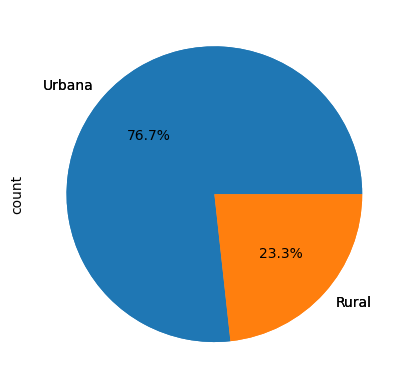

In [12]:
# gráfico de uf
df_dados['situacao_domicilio'].value_counts().plot(kind='pie')
# incluir valores percentuais
plt.pie(df_dados['situacao_domicilio'].value_counts(), labels=df_dados['situacao_domicilio'].value_counts().index, autopct='%1.1f%%')



# Count por instrução

<Axes: ylabel='escolaridade'>

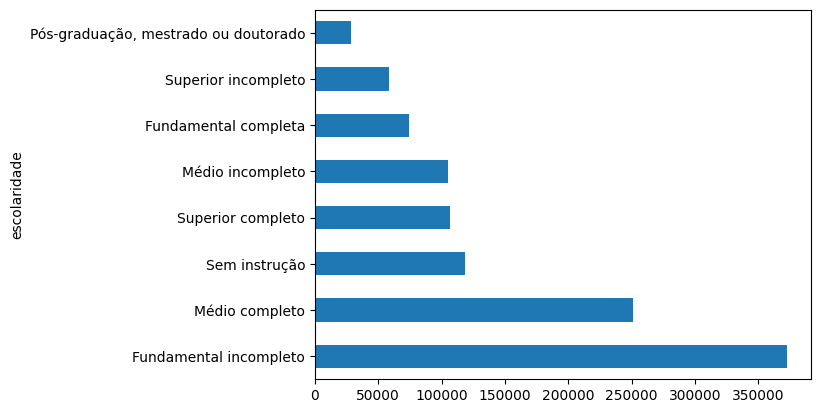

In [13]:
# gráfico de escolaridade
df_dados['escolaridade'].value_counts().plot(kind='barh')

In [14]:
# percentual de registro de escolaridade e formatando com opercentual
df_dados['escolaridade'].value_counts(normalize=True).map('{:.1%}'.format)

,proportion
escolaridade,
Fundamental incompleto,33.5%
Médio completo,22.5%
Sem instrução,10.7%
Superior completo,9.5%
Médio incompleto,9.4%
Fundamental completa,6.7%
Superior incompleto,5.2%
"Pós-graduação, mestrado ou doutorado",2.5%


# Espectro financeiro da população

Text(0.5, 1.0, 'Renda média por escolaridade')

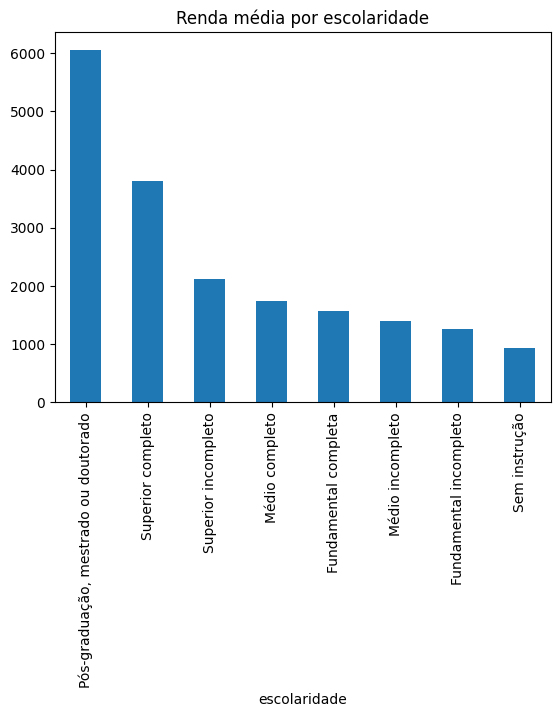

In [15]:
# plotando renda média por grau de escolaridade
df_dados.groupby('escolaridade')['valor_dinheiro'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('Renda média por escolaridade')

## Renda média por estado

- Habitantes do norte e nordeste possuem um rendimento médio menor do que habitantes das áreas sudeste, sul e centro oeste

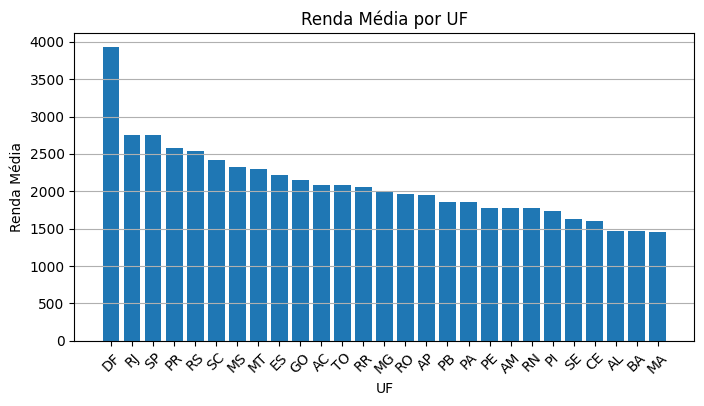

In [16]:
# Group By por estado tirando média de remuneração
df_remuneracao_media_uf = df_dados.groupby('uf')[['valor_dinheiro']].mean().sort_values(by='valor_dinheiro', ascending=False).reset_index()

# Plot
plt.figure(figsize=(8, 4))
# Dados
plt.bar(df_remuneracao_media_uf['uf'], df_remuneracao_media_uf['valor_dinheiro'])
# Linha de grade no Y
plt.grid(axis='y')
# Config
plt.xlabel('UF')
plt.ylabel('Renda Média')
plt.title('Renda Média por UF')
plt.xticks(rotation=45)
plt.show()

## Renda por area de atuação

In [17]:
# Contar áreas de atuação
df_dados['atividade_da_empresa'].value_counts()


,count
atividade_da_empresa,
Não aplicável,693274
"Agricultura, pecuária, produção florestal e pesca",61214
Comércio no atacado e varejo;,53358
Outro,33997
Indústria da transformação (inclusive confecção e fabricação caseira),32801
Educação,31071
Saúde humana e assistência social,27485
Construção,26865
"Administração pública (governo federal, estadual e municipal)",23693


- Áreas com menor renda média majoritariamente compostas por atuação presencial c2c ou b2c

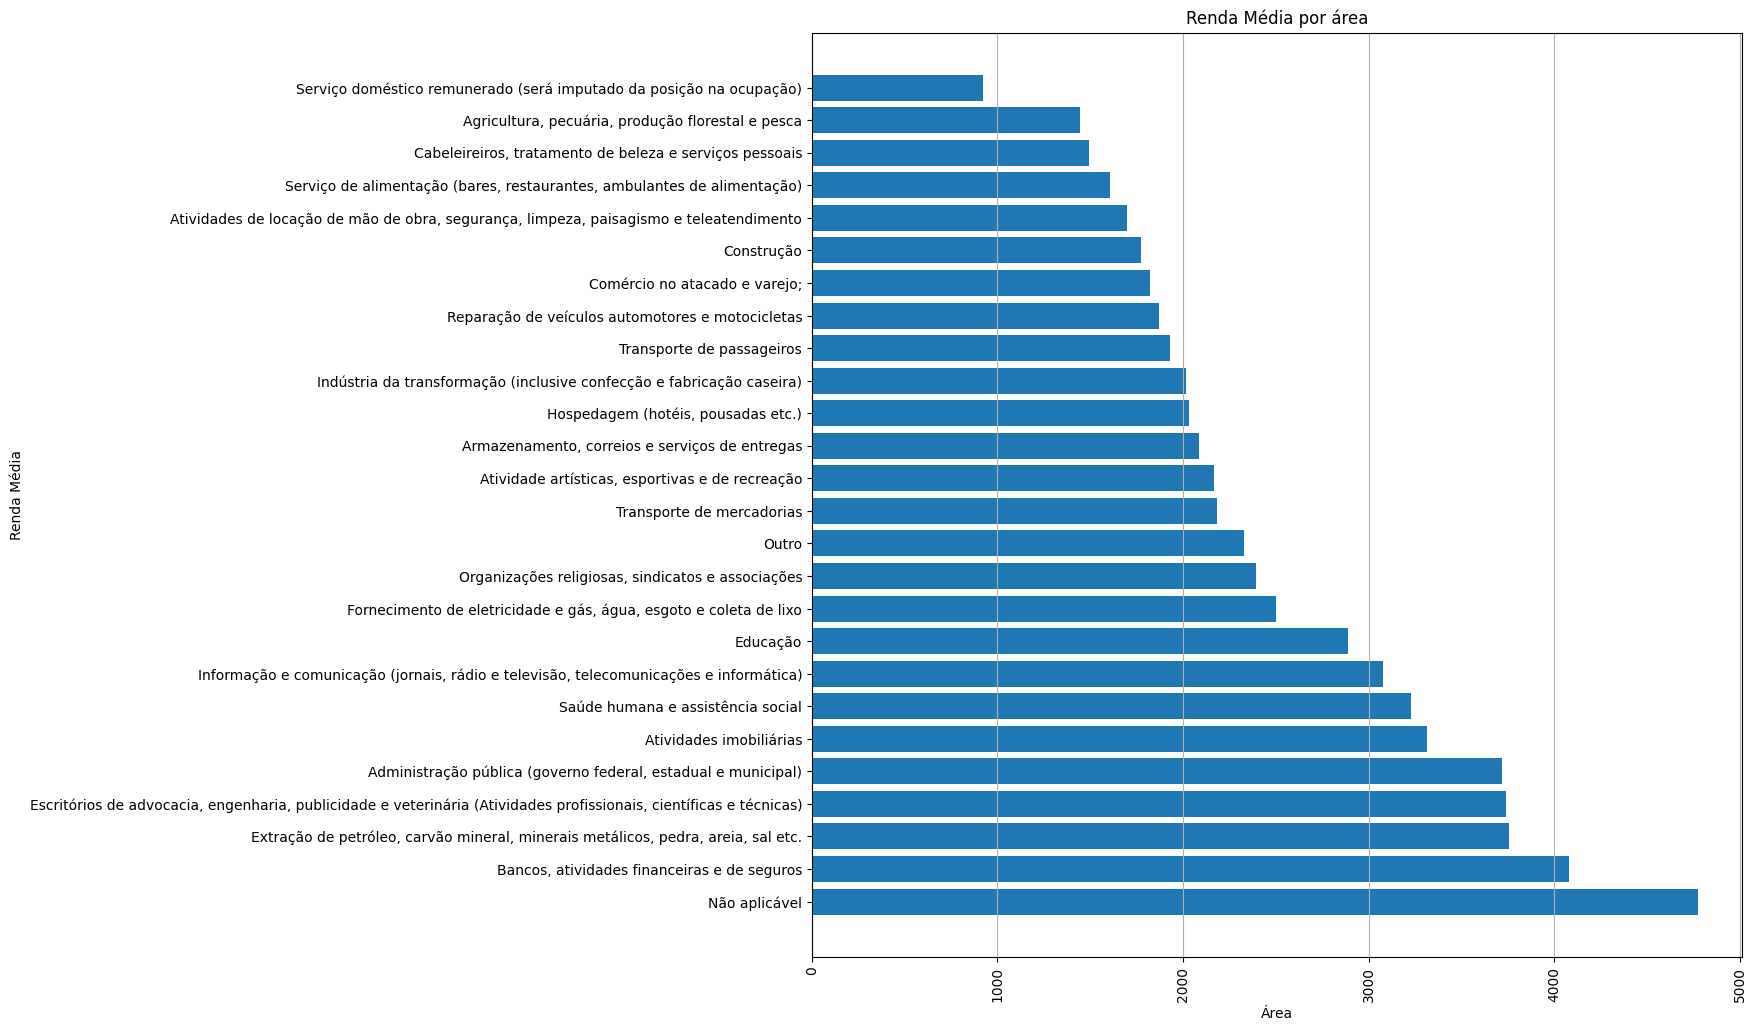

In [18]:
# Média de VALOR_DINHEIRO por atividade_da_empresa e contagem de registros
df_remuneracao_media_atividade = df_dados.groupby('atividade_da_empresa')[['valor_dinheiro']].mean().round(1).reset_index()
df_remuneracao_media_atividade['registros'] = df_dados.groupby('atividade_da_empresa')[['valor_dinheiro']].count().reset_index()['valor_dinheiro']

df_remuneracao_media_atividade.sort_values(by='valor_dinheiro', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(12, 12))
# Linha de grade no Y
plt.grid(axis='x')
# Dados
plt.barh(df_remuneracao_media_atividade['atividade_da_empresa'], df_remuneracao_media_atividade['valor_dinheiro'])
# Config
plt.xlabel('Área')
plt.ylabel('Renda Média')
plt.title('Renda Média por área')
plt.xticks(rotation=90)
plt.show()

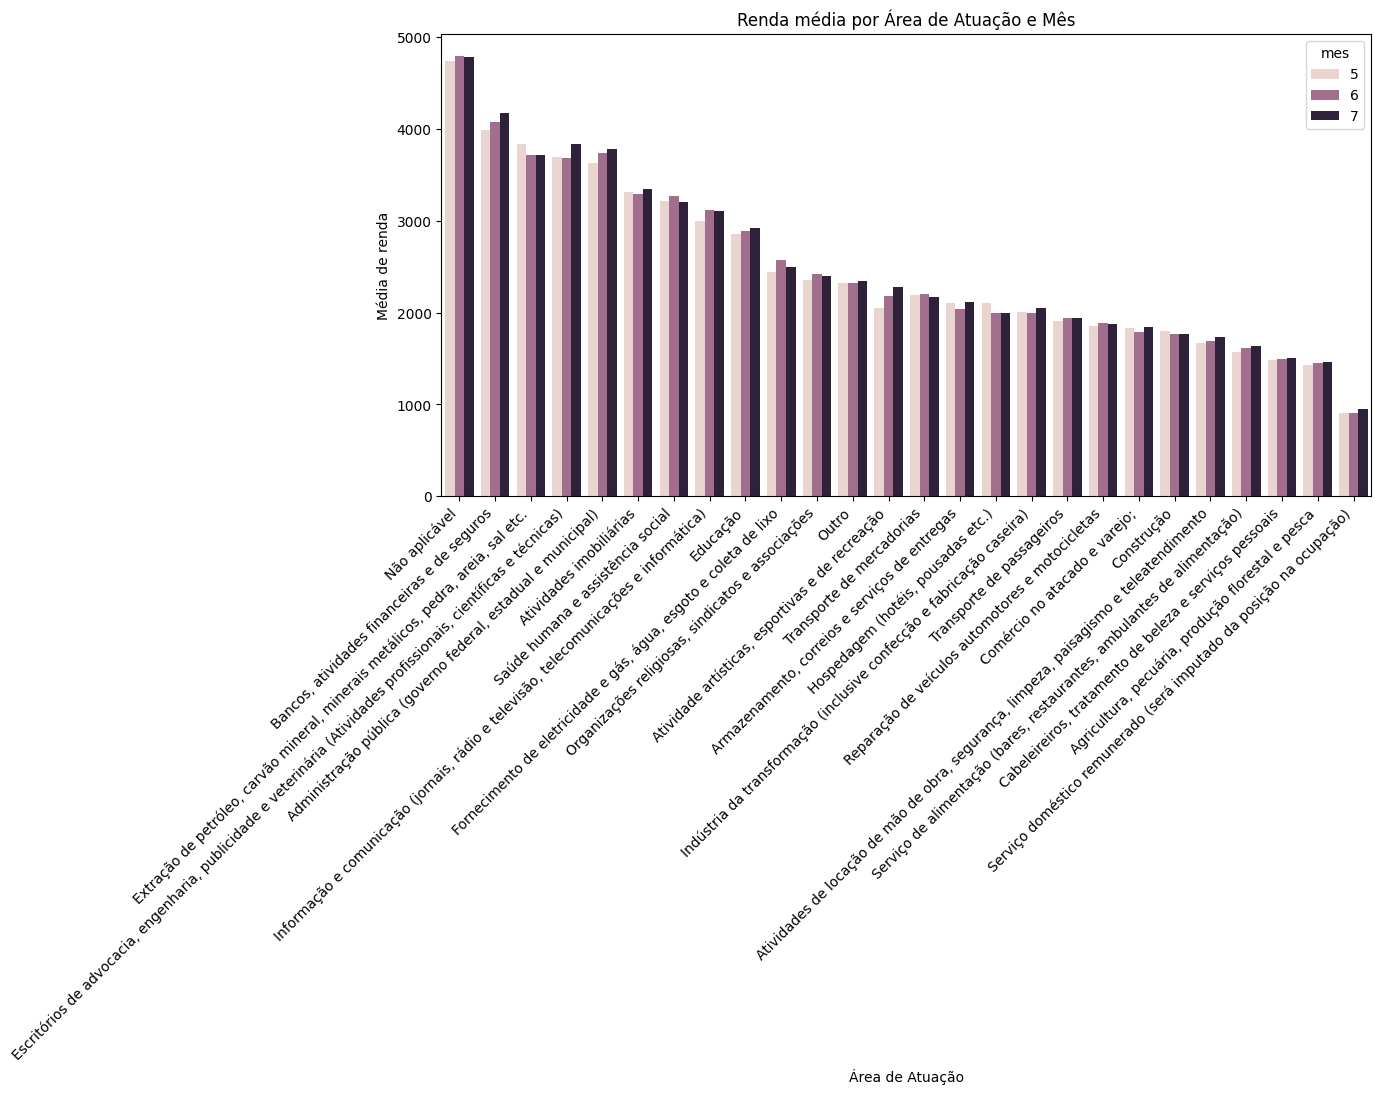

In [19]:
# Agrupando os dados e calculando a média de 'valor_dinheiro'
df_media_valor_dinheiro = df_dados.groupby(['atividade_da_empresa', 'mes'])['valor_dinheiro'].mean().sort_values(ascending=False).reset_index()

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='atividade_da_empresa', y='valor_dinheiro', hue='mes', data=df_media_valor_dinheiro)
plt.xlabel('Área de Atuação')
plt.ylabel('Média de renda')
plt.title('Renda média por Área de Atuação e Mês')
plt.xticks(rotation=45, ha='right')
plt.show()


## Renda vs comportamento na pandemia

- Percebe-se que a grande maioria das pessoas reduziu o contato com outras pessoas.
- Grande parte dos entrevistados continuou saindo de casa para trabalhar (percentual menor em áreas passivas de home office)
- Entrevistados continuaram saindo para realizar atividades não essenciais e recebendo visitas

In [20]:
# Coleta dos dados
renda_comportamento = df_dados[['atividade_da_empresa','medidas_isolamento']]

# Crosstab
renda_comportamento = pd.crosstab(renda_comportamento['atividade_da_empresa'], renda_comportamento['medidas_isolamento'])
renda_comportamento_perc = renda_comportamento.div(renda_comportamento.sum(axis=1), axis=0)
# Form pecentual
renda_comportamento_perc = renda_comportamento_perc.applymap(lambda x: '{:.1%}'.format(x))


<ipython-input-20-48d38c642fc7>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  renda_comportamento_perc = renda_comportamento_perc.applymap(lambda x: '{:.1%}'.format(x))


## Renda vs escolaridade

Seguindo o esperado, a renda aumenta conforme o grau de escolaridade aumenta

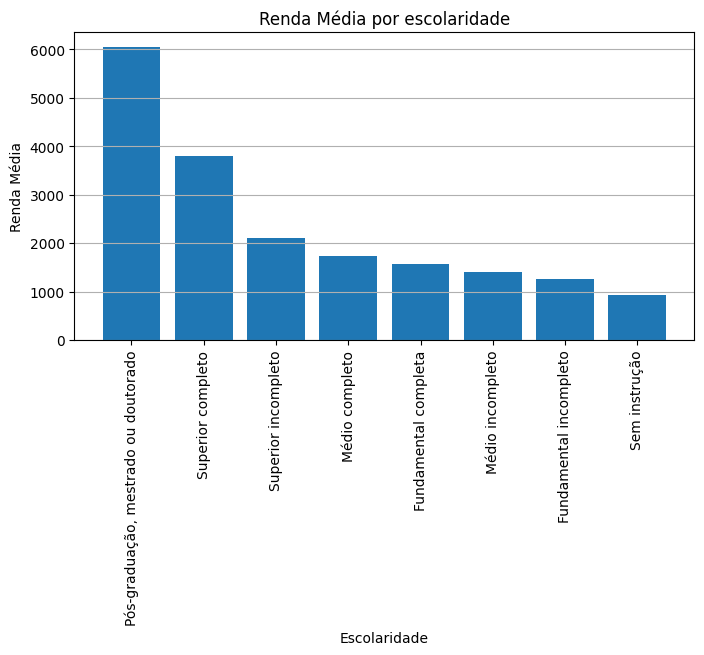

In [21]:
# Média de renda por área de atuação
df_renda_escola = df_dados.groupby('escolaridade')[['valor_dinheiro']].mean().round(1).reset_index()
df_renda_escola['registros'] = df_dados.groupby('escolaridade')[['valor_dinheiro']].count().reset_index()['valor_dinheiro']

df_renda_escola.sort_values(by='valor_dinheiro', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(8, 4))
# Linha de grade no Y
plt.grid(axis='y')
# Dados
plt.bar(df_renda_escola['escolaridade'], df_renda_escola['valor_dinheiro'])
# Config
plt.xlabel('Escolaridade')
plt.ylabel('Renda Média')
plt.title('Renda Média por escolaridade')
plt.xticks(rotation=90)
plt.show()

# Comportamento da população na época da pandemia

## Isolamento

In [22]:
# Contagem de comportamento
df_medidas_isolamento_count = df_dados.groupby('medidas_isolamento').size().reset_index(name='contagem')

# Order
df_medidas_isolamento_count.sort_values(by='contagem', ascending=False, inplace=True)
print(df_medidas_isolamento_count)

                                  medidas_isolamento  contagem
0  Ficou em casa e só saiu em caso de necessidade...    172452
4  Reduziu o contato com as pessoas, mas continuo...    112593
1                        Ficou rigorosamente em casa     89634
3  Não fez restrição, levou vida normal como ante...      7195
2                                           Ignorado      2292


Nos primeiros meses houve uma onda muito forte sobre as medidas de isolamento, influenciando na quantidade de internações, isto é, elas foram extremamente baixas

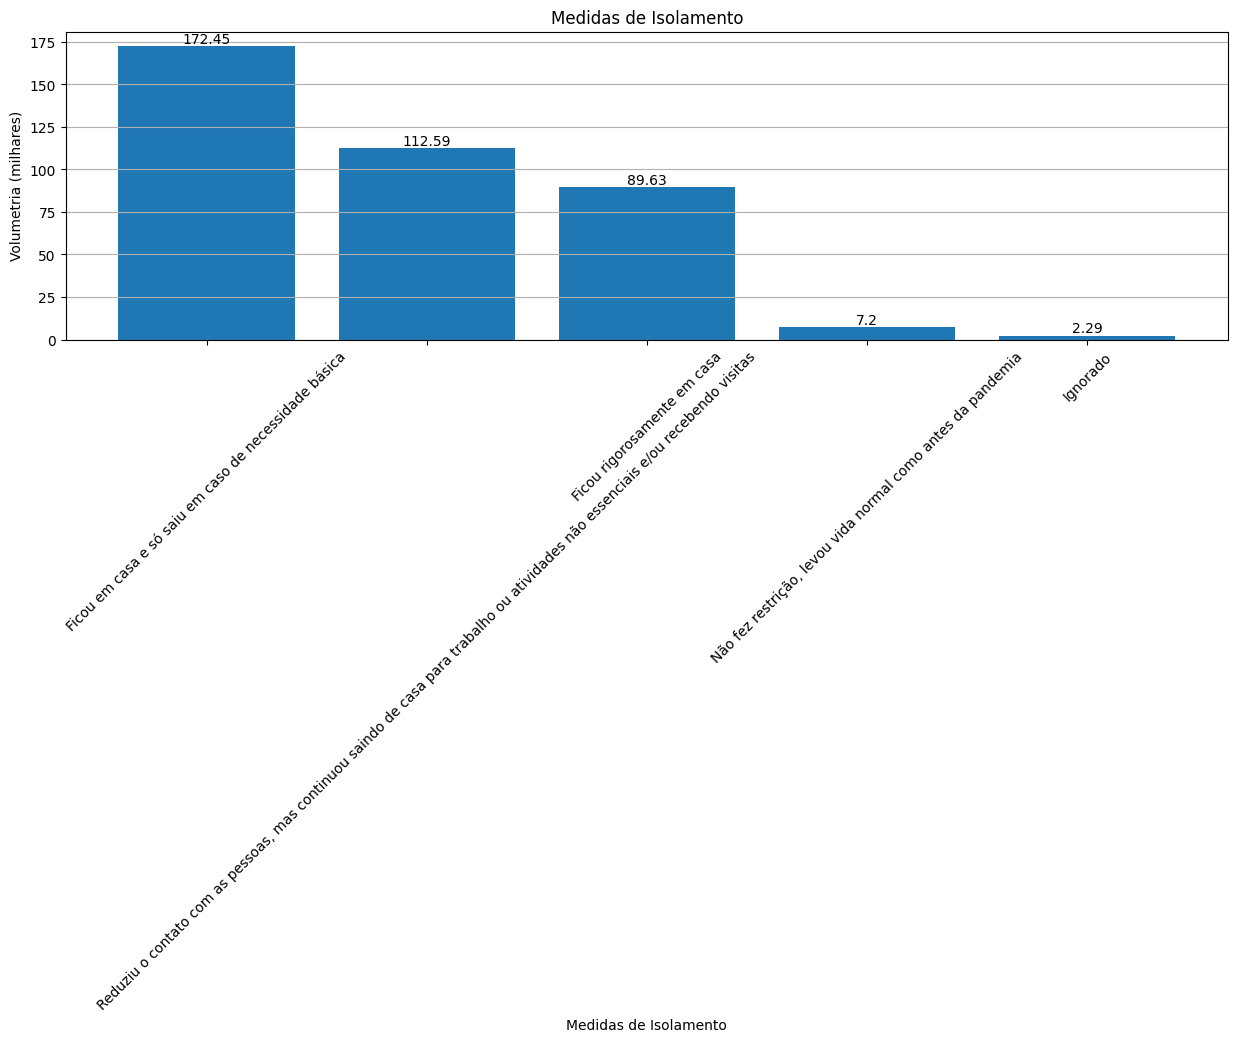

In [23]:
# medidas_isolamento

# Plot
plt.figure(figsize=(15, 4))
# Dados
plt.bar(df_medidas_isolamento_count['medidas_isolamento'], df_medidas_isolamento_count['contagem'] / 1000)
# Rótulos em cima das barras
for i, v in enumerate(df_medidas_isolamento_count['contagem'] / 1000):
  plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
# Linha de grade no Y
plt.grid(axis='y')
# Config
plt.xlabel('Medidas de Isolamento')
plt.ylabel('Volumetria (milhares)')
plt.title('Medidas de Isolamento')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Agrupar por 'internacao' e contar a quantidade de registros
df_internacao_count = df_dados.groupby('internacao').size().reset_index(name='contagem')

# Ordenar o DataFrame pela contagem em ordem decrescente
df_internacao_count.sort_values(by='contagem', ascending=False, inplace=True)

print(df_internacao_count)

         internacao  contagem
2     Não aplicável   1108442
1               Não      5478
4               Sim       692
3  Não foi atendido       129
0          Ignorado         1


In [25]:
# Internação x mês

# Agrupar por mês e contar os valores "Sim" para internação
df_internacao_mes = df_dados[df_dados['internacao'] == 'Sim'].groupby('mes')['internacao'].count().reset_index(name='contagem')
print(df_internacao_mes)

   mes  contagem
0    5       200
1    6       227
2    7       265


## Home office

- Comportamento faz sentido
  - Atividades de logística, agricultura e pecuária, serviços e atendimentos diversos têm baixa d=taxa de home office
  - Na contramão, atividades corporativas, realizadas em computador e não essenciais têm baixa recorrência de trabalho presencial

<Axes: ylabel='atividade_da_empresa'>

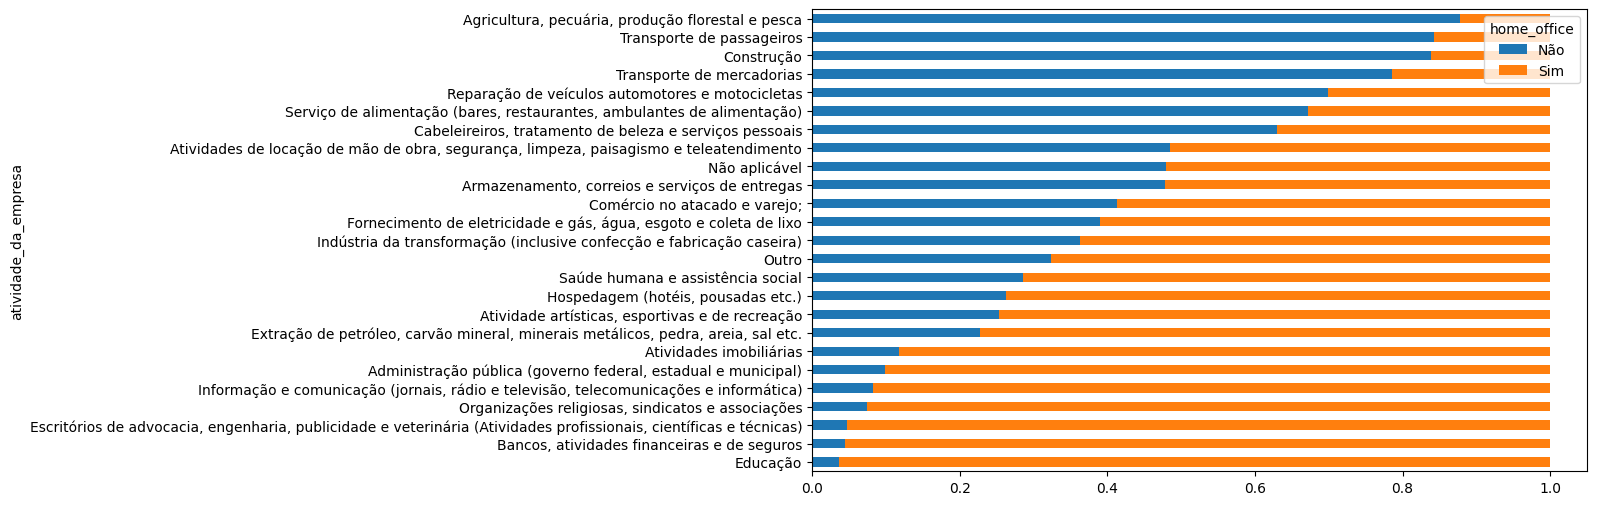

In [26]:
# Remover não aplicável
df_dados = df_dados[df_dados['home_office'] != 'Não aplicável']

group = pd.crosstab(df_dados['atividade_da_empresa'], df_dados['home_office'])
group_perc = group.div(group.sum(axis=1), axis=0)

# Ordenando
group_perc = group_perc.sort_values(by=group_perc.loc[:, 'Sim'].name, ascending=False, axis=0)
group_perc.plot(kind='barh', stacked=True, figsize=(10, 6))

## Tipo de domicílio

In [27]:
# Entendendo os dados
df_situacao_domicilio_count = df_dados.groupby('situacao_domicilio').size().reset_index(name='contagem')

# Ordenar o DataFrame pela contagem em ordem decrescente
df_situacao_domicilio_count.sort_values(by='contagem', ascending=False, inplace=True)

print(df_situacao_domicilio_count)

  situacao_domicilio  contagem
1             Urbana     47250
0              Rural      4894


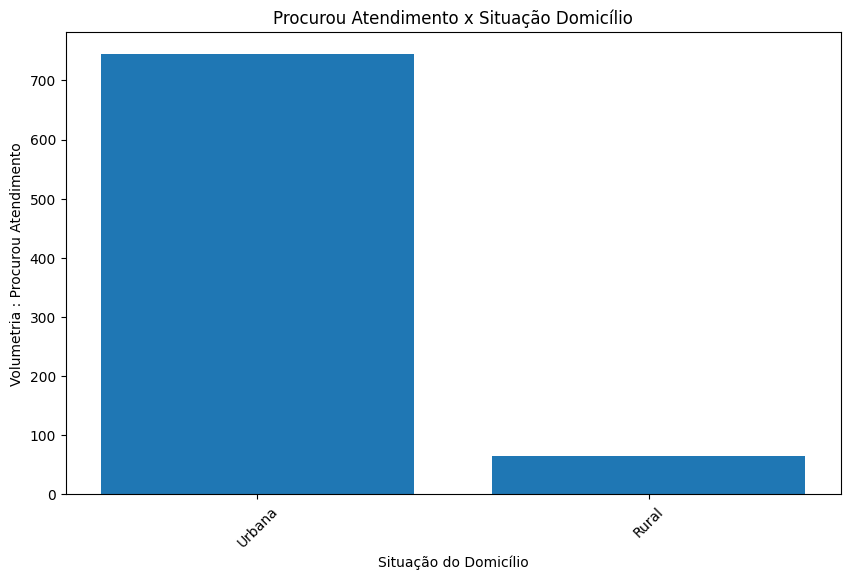

In [28]:
# Filtro
df_procurou_atendimento_sim = df_dados[df_dados['procurou_atendimento'] == 'Sim']

# Agrupar por situacao_domicilio e contar a quantidade de registros
df_procurou_atendimento_situacao = df_procurou_atendimento_sim.groupby('situacao_domicilio')['procurou_atendimento'].count().reset_index(name='contagem')

# Ordenar o DataFrame pela contagem em ordem decrescente
df_procurou_atendimento_situacao.sort_values(by='contagem', ascending=False, inplace=True)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_procurou_atendimento_situacao['situacao_domicilio'], df_procurou_atendimento_situacao['contagem'])
plt.xlabel('Situação do Domicílio')
plt.ylabel('Volumetria : Procurou Atendimento')
plt.title('Procurou Atendimento x Situação Domicílio')
plt.xticks(rotation=45)
plt.show()


## Horas de trabalho por area de atuação

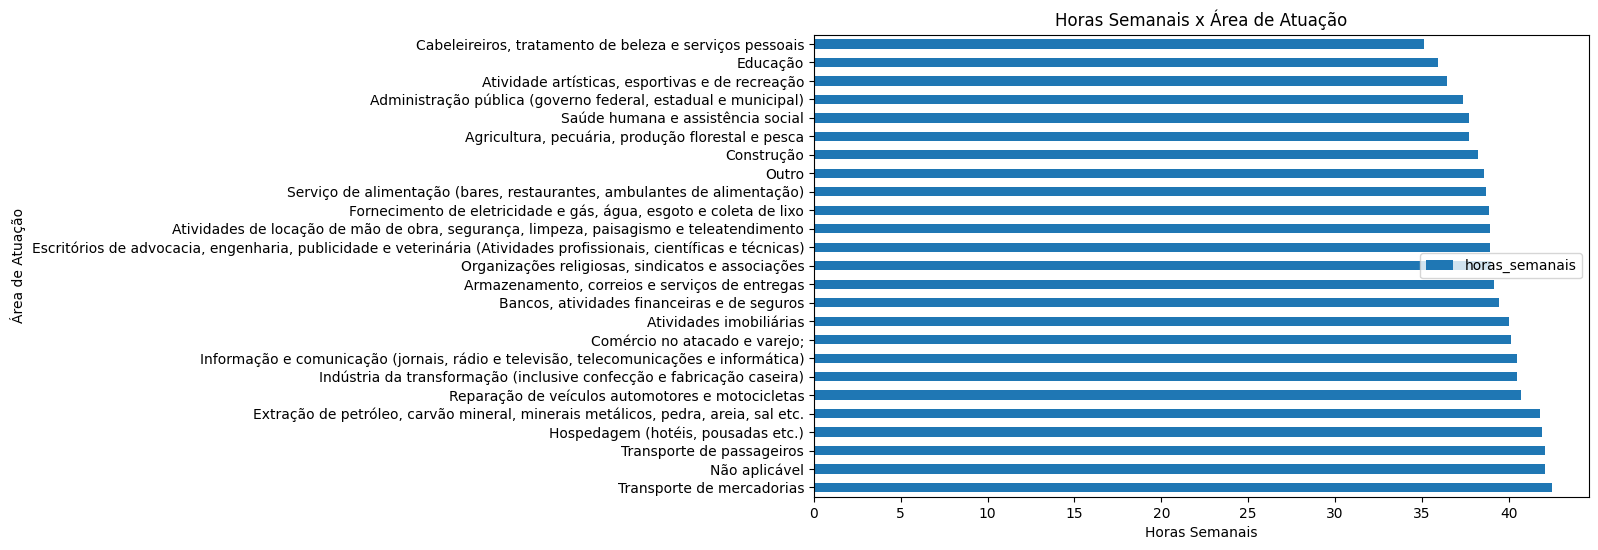

In [29]:
# Plot de areas de atuação e média de horas semanais
df_horas_semana = df_dados.groupby('atividade_da_empresa')['horas_semanais'].mean().reset_index()
df_horas_semana.sort_values(by='horas_semanais', ascending=False, inplace=True)
df_horas_semana.plot(kind='barh', x='atividade_da_empresa', y='horas_semanais', figsize=(10, 6))
plt.xlabel('Horas Semanais')
plt.ylabel('Área de Atuação')
plt.title('Horas Semanais x Área de Atuação')
plt.show()

# Questões de saúde

## Sintomas

In [30]:
df_dados.columns

Index(['mes', 'uf', 'sexo', 'raca_cor', 'situacao_domicilio', 'escolaridade',
       'frequenta_escola', 'atividade_da_empresa', 'horas_semanais',
       'home_office', 'faixa_rendimento', 'valor_dinheiro', 'sintoma_febre',
       'sintoma_tosse', 'sintoma_fadiga', 'procurou_atendimento',
       'resultado_exame_cotonete', 'resultado_exame_sangue_dedo',
       'resultado_exame_sangue_veia', 'internacao', 'medidas_isolamento'],
      dtype='object')

In [31]:
# count de sintoma_febre = sim
df_dados['sintoma_febre'].value_counts(normalize=True)

,proportion
sintoma_febre,
Não,0.981747
Sim,0.017465
Não sabe,0.000788


In [32]:
# count de sintoma_tosse = sim
df_dados['sintoma_tosse'].value_counts(normalize=True)

,proportion
sintoma_tosse,
Não,0.971873
Sim,0.027301
Não sabe,0.000826


In [33]:
# count de sintoma_fadiga = sim
df_dados['sintoma_fadiga'].value_counts(normalize=True)

,proportion
sintoma_fadiga,
Não,0.980419
Sim,0.018582
Não sabe,0.000999


In [34]:
# se sintoma = sim, 1. Se não, 0
df_corr = df_dados.copy()
df_corr['sintoma_febre'] = df_corr['sintoma_febre'].apply(lambda x: 1 if x == 'Sim' else 0)
df_corr['sintoma_tosse'] = df_corr['sintoma_tosse'].apply(lambda x: 1 if x == 'Sim' else 0)
df_corr['sintoma_fadiga'] = df_corr['sintoma_fadiga'].apply(lambda x: 1 if x == 'Sim' else 0)

In [35]:
# matriz ed correlação entre os sintomas
df_corr[['sintoma_febre', 'sintoma_tosse', 'sintoma_fadiga']].corr()

,sintoma_febre,sintoma_tosse,sintoma_fadiga
sintoma_febre,1.000000,0.405203,0.385737
sintoma_tosse,0.405203,1.000000,0.359402
sintoma_fadiga,0.385737,0.359402,1.000000


Podemos inferir que o sintoma de febre é o predominante, e o de tosse muitas vezes não é sentido por todos os pacientes sintomáticos, isto é, febre pode ser o 1º ou 2º sintoma e caso começar a ter pode-se dizer que é um sinal de alerta
A fadiga chama atenção pois apesar de não ser predominante ela tem maiores volumes em alguns estados como MG/RJ/SC e SP, onde este último temos um pico

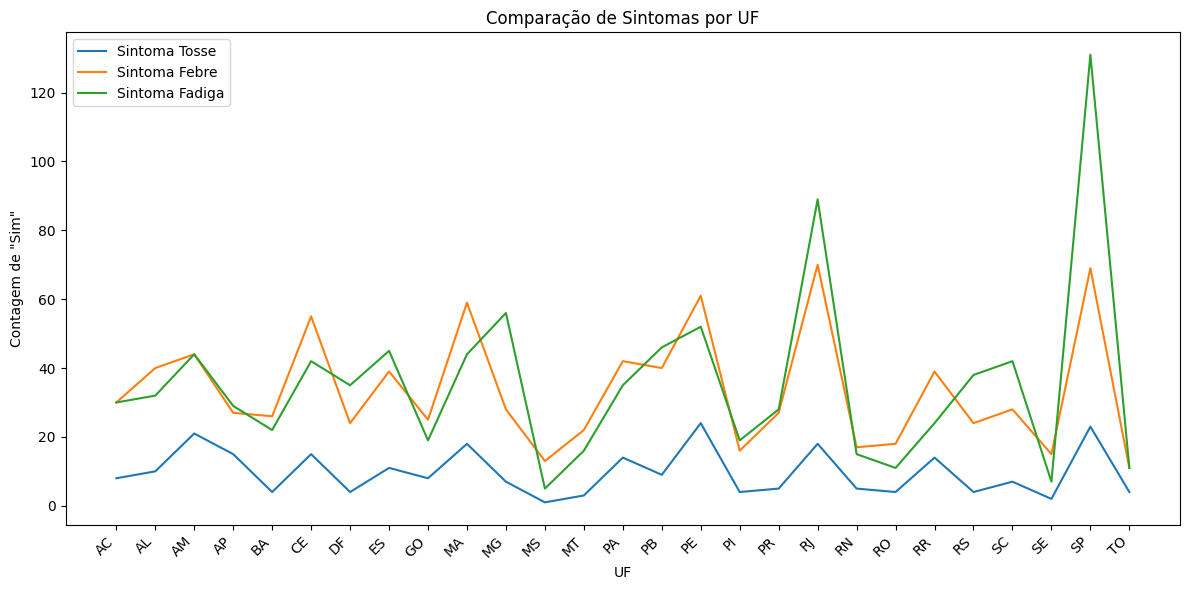

In [36]:
# Sintomas x Estado

# Filtrar as colunas de interesse
df_sintomas = df_dados[['uf', 'sintoma_tosse', 'sintoma_febre', 'sintoma_fadiga']]

# Filtrar apenas os valores "Sim"
df_sintomas = df_sintomas[df_sintomas['sintoma_tosse'] == 'Sim']
df_sintomas = df_sintomas[df_sintomas['sintoma_febre'] == 'Sim']
df_sintomas = df_sintomas[df_sintomas['sintoma_fadiga'] == 'Sim']

# Agrupar por UF e contar os valores "Sim"
df_agrupado = df_sintomas.groupby('uf').size().reset_index(name='contagem')

#Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_agrupado['uf'], df_agrupado['contagem'], label='Sintoma Tosse')

#Repetir o processo para as outras colunas
df_sintomas = df_dados[['uf', 'sintoma_febre']]
df_sintomas = df_sintomas[df_sintomas['sintoma_febre'] == 'Sim']
df_agrupado = df_sintomas.groupby('uf').size().reset_index(name='contagem')
plt.plot(df_agrupado['uf'], df_agrupado['contagem'], label='Sintoma Febre')

df_sintomas = df_dados[['uf', 'sintoma_fadiga']]
df_sintomas = df_sintomas[df_sintomas['sintoma_fadiga'] == 'Sim']
df_agrupado = df_sintomas.groupby('uf').size().reset_index(name='contagem')
plt.plot(df_agrupado['uf'], df_agrupado['contagem'], label='Sintoma Fadiga')

#Configurar o gráfico
plt.xlabel('UF')
plt.ylabel('Contagem de "Sim"')
plt.title('Comparação de Sintomas por UF')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Entendemos que a área da eduação foi a mais afetada, talvez por conta das crianças terem mais contato um com o outro através de brinquedos, brincadeiras ou material escolar

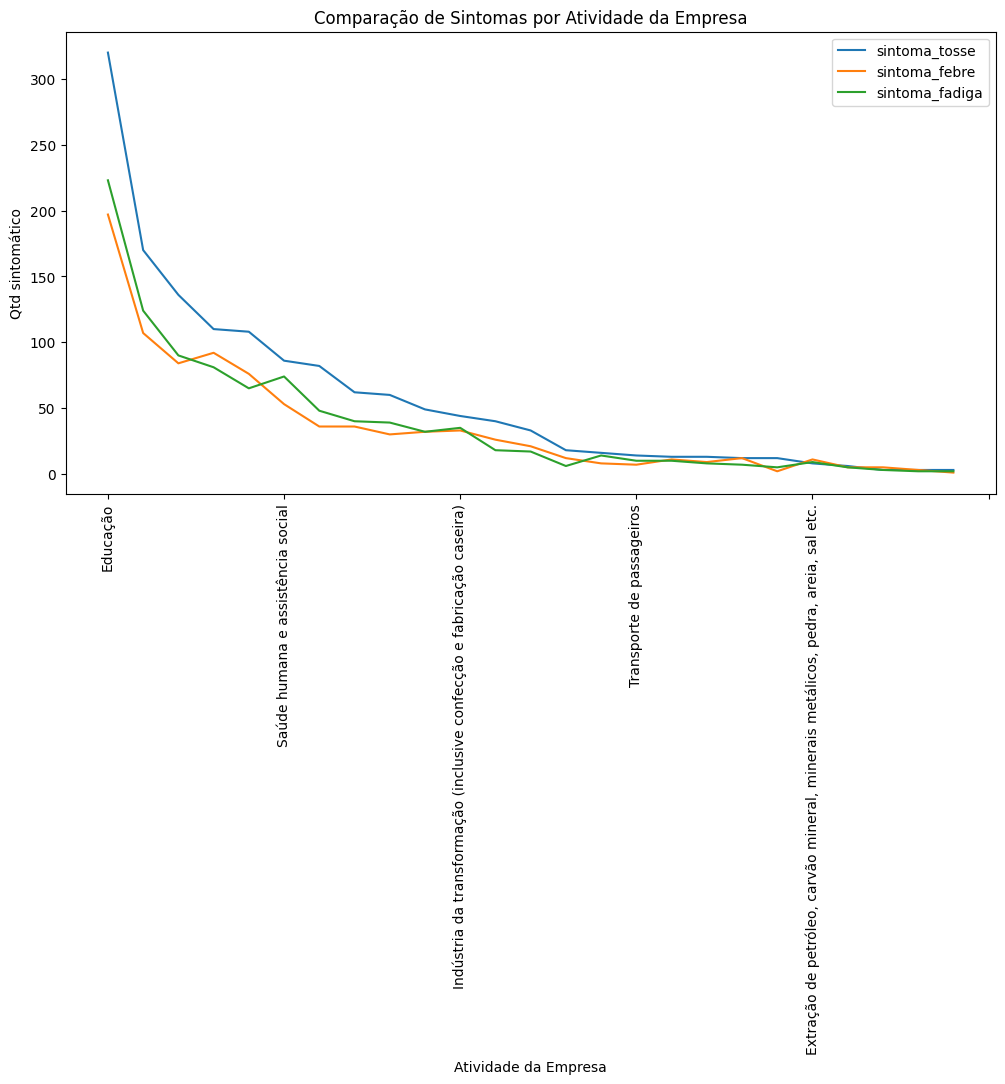

In [37]:
# Qtd Sintomas x Atividade empresarial

# Setando apenas o que é sim
df_sintomas_sim = df_dados[
    (df_dados['sintoma_tosse'] == 'Sim') |
    (df_dados['sintoma_febre'] == 'Sim') |
    (df_dados['sintoma_fadiga'] == 'Sim')
]

# Agrupar por atividade_da_empresa e contar os valores "Sim" para cada sintoma
df_sintomas_agrupado = df_sintomas_sim.groupby('atividade_da_empresa').agg(
    sintoma_tosse=('sintoma_tosse', lambda x: (x == 'Sim').sum()),
    sintoma_febre=('sintoma_febre', lambda x: (x == 'Sim').sum()),
    sintoma_fadiga=('sintoma_fadiga', lambda x: (x == 'Sim').sum())
).sort_values(by=['sintoma_tosse', 'sintoma_febre', 'sintoma_fadiga'], ascending=False)

# Gráfico
df_sintomas_agrupado.plot(kind='line', figsize=(12, 6))
plt.title('Comparação de Sintomas por Atividade da Empresa')
plt.xlabel('Atividade da Empresa')
plt.ylabel('Qtd sintomático')
plt.xticks(rotation=90)
plt.legend()
plt.show()


## Count de exames positivos

In [38]:
# count de positivo em df_Dados['resultado_exame_sangue_dedo']
df_dados['uf'].value_counts()


,count
uf,
SP,7063
RJ,6136
MG,4195
SC,3382
PR,3215
RS,3196
ES,2141
CE,1946
PE,1915


## Exames positivos por horas semanais e area de atuação
- Gráfico de dispersão de horas x área e  hue = positivo?

<ipython-input-39-be83cac1fa44>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, cmap='viridis')


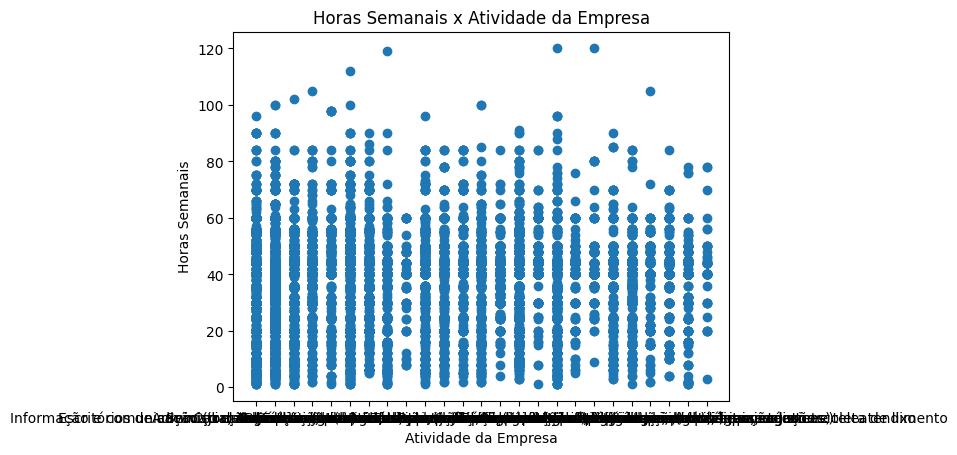

In [39]:
# gráfico de dispersão
x = df_dados['atividade_da_empresa']
y = df_dados['horas_semanais']
plt.scatter(x, y, cmap='viridis')
plt.xlabel('Atividade da Empresa')
plt.ylabel('Horas Semanais')
plt.title('Horas Semanais x Atividade da Empresa')
plt.show()

## Busca por atendimento

In [40]:
# Qtd de pessoas que procuraram atendimento
count_sim = df_dados['procurou_atendimento'].value_counts()['Sim']

print(f'Qtd : {count_sim}')

Qtd : 809


## Sintomas e resultados

Nos primeiros meses poucas pessoas ficaram internadas, porém podemos analisar que as medidas de isolamento começaram a surtir efeito logo em seguida, isto é, podemos inferir que as medidas de isolamento foram determinantes para o vírus não se espalhar

In [41]:
# Internação x mês

# Agrupar por mês e contar os valores "Sim" para internação
df_internacao_mes = df_dados[df_dados['internacao'] == 'Sim'].groupby('mes')['internacao'].count().reset_index(name='contagem')
# print(df_internacao_mes)


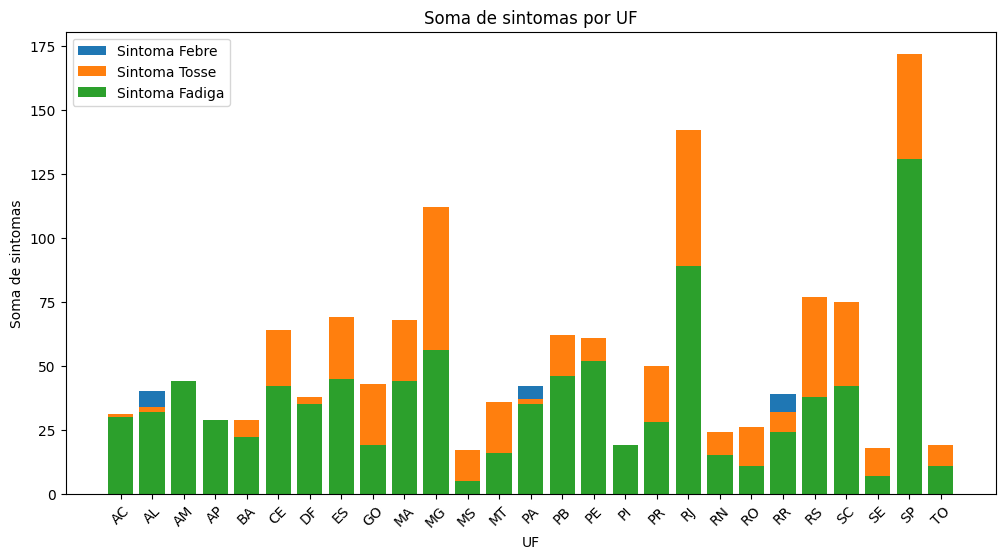

In [61]:
# Grafico de sintomas
df_agrupado = df_dados.groupby('uf').agg({
    'sintoma_febre': lambda x: (x == 'Sim').sum(),
    'sintoma_tosse': lambda x: (x == 'Sim').sum(),
    'sintoma_fadiga': lambda x: (x == 'Sim').sum()
}).reset_index()

# Plotando gráfico
plt.figure(figsize=(12, 6))
plt.bar(df_agrupado['uf'], df_agrupado['sintoma_febre'], label='Sintoma Febre')
plt.bar(df_agrupado['uf'], df_agrupado['sintoma_tosse'], label='Sintoma Tosse')
plt.bar(df_agrupado['uf'], df_agrupado['sintoma_fadiga'], label='Sintoma Fadiga')
plt.xlabel('UF')
plt.ylabel('Soma de sintomas')
plt.title('Soma de sintomas por UF')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [43]:
df_dados.columns

Index(['mes', 'uf', 'sexo', 'raca_cor', 'situacao_domicilio', 'escolaridade',
       'frequenta_escola', 'atividade_da_empresa', 'horas_semanais',
       'home_office', 'faixa_rendimento', 'valor_dinheiro', 'sintoma_febre',
       'sintoma_tosse', 'sintoma_fadiga', 'procurou_atendimento',
       'resultado_exame_cotonete', 'resultado_exame_sangue_dedo',
       'resultado_exame_sangue_veia', 'internacao', 'medidas_isolamento'],
      dtype='object')

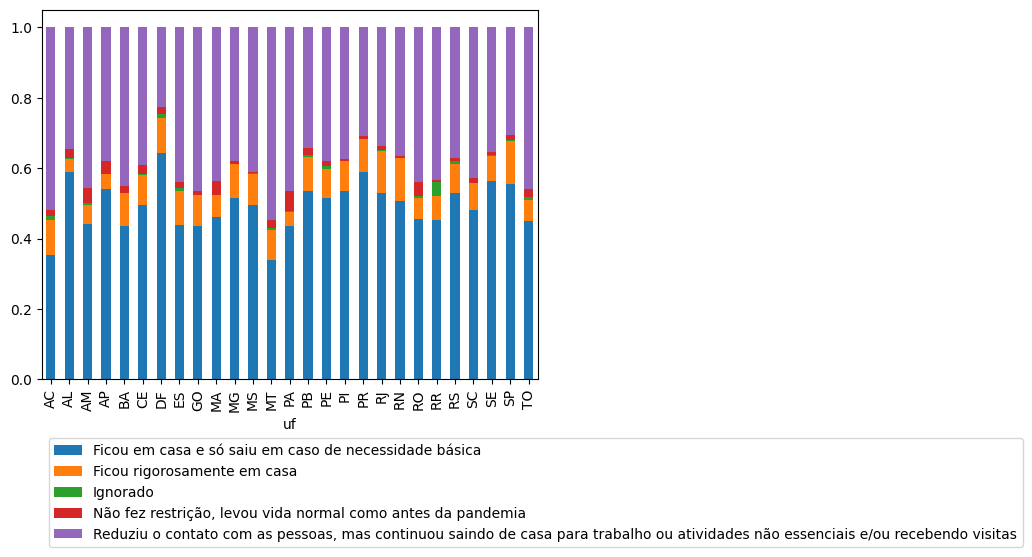

In [44]:
# respostas de medidas_isolamento por uf
df_dados.groupby('uf')['medidas_isolamento'].value_counts()
# percentual de respostas de medidas_isolamento por uf
df_dados.groupby('uf')['medidas_isolamento'].value_counts(normalize=True)
# gráfico de barra 100% empilhada
df_dados.groupby('uf')['medidas_isolamento'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

# jogar legenda para abaixo do grafico
plt.legend(bbox_to_anchor=(0.0, -0.14), loc='upper left')
plt.show()

In [46]:
df_comp = df_dados['medidas_isolamento'].value_counts(normalize=True)
df_comp

,proportion
medidas_isolamento,
Ficou em casa e só saiu em caso de necessidade básica,0.510711
"Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas",0.376372
Ficou rigorosamente em casa,0.092656
"Não fez restrição, levou vida normal como antes da pandemia",0.016313
Ignorado,0.003948


In [47]:
df_comp_1 = df_dados['medidas_isolamento'].value_counts()
df_comp_1

,count
medidas_isolamento,
Ficou em casa e só saiu em caso de necessidade básica,8797
"Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas",6483
Ficou rigorosamente em casa,1596
"Não fez restrição, levou vida normal como antes da pandemia",281
Ignorado,68


In [48]:
# Criando a coluna 'sintoma_qualquer_sim' e atribuindo 0 inicialmente
df_dados['sintoma_qualquer_sim'] = 0

# Atribuindo 1 se houver 'Sim' em alguma das colunas de sintomas
df_dados.loc[
    (df_dados['sintoma_tosse'] == 'Sim') |
    (df_dados['sintoma_fadiga'] == 'Sim') |
    (df_dados['sintoma_febre'] == 'Sim'),
    'sintoma_qualquer_sim'
] = 1

In [49]:
df_dados['sintoma_qualquer_sim'].value_counts(normalize=True)

,proportion
sintoma_qualquer_sim,
0,0.95639
1,0.04361


In [50]:
df_dados.columns

Index(['mes', 'uf', 'sexo', 'raca_cor', 'situacao_domicilio', 'escolaridade',
       'frequenta_escola', 'atividade_da_empresa', 'horas_semanais',
       'home_office', 'faixa_rendimento', 'valor_dinheiro', 'sintoma_febre',
       'sintoma_tosse', 'sintoma_fadiga', 'procurou_atendimento',
       'resultado_exame_cotonete', 'resultado_exame_sangue_dedo',
       'resultado_exame_sangue_veia', 'internacao', 'medidas_isolamento',
       'sintoma_qualquer_sim'],
      dtype='object')

In [51]:
# Criando a coluna 'teste_qualquer_sim' e atribuindo 0 inicialmente
df_dados['teste_qualquer_sim'] = 0

# Atribuindo 1 se houver 'Sim' em alguma das colunas de sintomas
df_dados.loc[
    (df_dados['resultado_exame_cotonete'] == 'Positivo') |
    (df_dados['resultado_exame_sangue_dedo'] == 'Positivo') |
    (df_dados['resultado_exame_sangue_veia'] == 'Positivo'),
    'teste_qualquer_sim'
] = 1

In [52]:
df_dados['teste_qualquer_sim'].value_counts(normalize=True)

,proportion
teste_qualquer_sim,
0,0.993671
1,0.006329


In [53]:
df_dados['procurou_atendimento'].value_counts(normalize=True)

,proportion
procurou_atendimento,
Não aplicável,0.889959
Não,0.094527
Sim,0.015515


In [54]:
# sintoma_qualquer_sim vs procurou_atendimento
df_dados.groupby('sintoma_qualquer_sim')['procurou_atendimento'].value_counts(normalize=True)

sintoma_qualquer_sim  procurou_atendimento
0                     Não aplicável           0.930539
                      Não                     0.064528
                      Sim                     0.004933
1                     Não                     0.752419
                      Sim                     0.247581
Name: proportion, dtype: float64

In [55]:
# procurou_atendimento vs teste_qualquer_sim
df_dados.groupby('sintoma_qualquer_sim')['teste_qualquer_sim'].value_counts(normalize=True)

sintoma_qualquer_sim  teste_qualquer_sim
0                     0                     0.994666
                      1                     0.005334
1                     0                     0.971856
                      1                     0.028144
Name: proportion, dtype: float64

In [56]:
df_dados.groupby('sintoma_febre')['teste_qualquer_sim'].value_counts(normalize=True)

sintoma_febre  teste_qualquer_sim
Não            0                     0.994324
               1                     0.005676
Não sabe       0                     1.000000
Sim            0                     0.955996
               1                     0.044004
Name: proportion, dtype: float64

In [57]:
df_dados.groupby('sintoma_tosse')['teste_qualquer_sim'].value_counts(normalize=True)

sintoma_tosse  teste_qualquer_sim
Não            0                     0.994386
               1                     0.005614
Não sabe       0                     1.000000
Sim            0                     0.967628
               1                     0.032372
Name: proportion, dtype: float64

In [64]:
df_dados.groupby('sintoma_fadiga')['teste_qualquer_sim'].value_counts(normalize=True)

sintoma_fadiga  teste_qualquer_sim
Não             0                     0.994355
                1                     0.005645
Não sabe        0                     1.000000
Sim             0                     0.957601
                1                     0.042399
Name: proportion, dtype: float64

In [66]:
df_dados.groupby('uf')['teste_qualquer_sim'].sum()

,teste_qualquer_sim
uf,
AC,6
AL,12
AM,13
AP,13
BA,11
CE,14
DF,19
ES,10
GO,5


In [93]:
# Dados populacionais
populacao_data = {
    'Unidade Federativa': [
        'São Paulo', 'Rio de Janeiro', 'Bahia', 'Paraná', 'Rio Grande do Sul',
        'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina', 'Goiás',
        'Maranhão', 'Amazonas', 'Paraíba', 'Espírito Santo', 'Mato Grosso',
        'Rio Grande do Norte', 'Piauí', 'Alagoas', 'Distrito Federal',
        'Mato Grosso do Sul', 'Sergipe', 'Rondônia', 'Tocantins', 'Acre',
        'Amapá', 'Roraima'
    ],
    'População': [
        44411238, 16054524, 14141626, 11444380, 10882965,
        9058931, 8794957, 8121025, 7610361, 7056495,
        6775805, 3941613, 3974687, 3833712, 3658649,
        3302729, 3271199, 3127683, 2817381, 2757013,
        2209558, 1581196, 1511460, 830018, 733759,
        636707
    ]
}

# Dados de testes positivos
testes_data = {
    'uf': [
        'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES',
        'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB',
        'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
        'RS', 'SC', 'SE', 'SP', 'TO'
    ],
    'Testes Positivos': [
        6, 12, 13, 13, 11, 14, 19, 10, 5, 28,
        8, 2, 11, 19, 18, 13, 13, 3, 29, 8,
        3, 7, 8, 14, 5, 35, 3
    ]
}

# Criar DataFrames
df_populacao = pd.DataFrame(populacao_data)
df_testes = pd.DataFrame(testes_data)

# Mapear siglas das unidades federativas para nomes completos
siglas = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AM': 'Amazonas', 'AP': 'Amapá',
    'BA': 'Bahia', 'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo',
    'GO': 'Goiás', 'MA': 'Maranhão', 'MG': 'Minas Gerais', 'MS': 'Mato Grosso do Sul',
    'MT': 'Mato Grosso', 'PA': 'Pará', 'PB': 'Paraíba', 'PE': 'Pernambuco',
    'PI': 'Piauí', 'PR': 'Paraná', 'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte',
    'RO': 'Rondônia', 'RR': 'Roraima', 'RS': 'Rio Grande do Sul', 'SC': 'Santa Catarina',
    'SE': 'Sergipe', 'SP': 'São Paulo', 'TO': 'Tocantins'
}

# Adicionar a coluna Unidade Federativa ao DataFrame de testes
df_testes['Unidade Federativa'] = df_testes['uf'].map(siglas)

# Unir os DataFrames
df = pd.merge(df_populacao, df_testes[['Unidade Federativa', 'Testes Positivos']], on='Unidade Federativa')

# Calcular a taxa de positivos por estado
df['Taxa Positivos'] = (df['Testes Positivos'] / df['População'])

# tirar notação cientifica
pd.options.display.float_format = '{:.11f}'.format

df.sort_values(by='Taxa Positivos', ascending=False, inplace=True)

df


,Unidade Federativa,População,Testes Positivos,Taxa Positivos
24,Amapá,733759,13,0.00001771699
25,Roraima,636707,7,0.00001099407
23,Acre,830018,6,0.00000722876
18,Distrito Federal,2817381,19,0.00000674385
12,Paraíba,3974687,18,0.00000452866
10,Maranhão,6775805,28,0.00000413235
16,Piauí,3271199,13,0.00000397408
17,Alagoas,3127683,12,0.00000383671
11,Amazonas,3941613,13,0.00000329814
14,Mato Grosso,3658649,11,0.00000300657


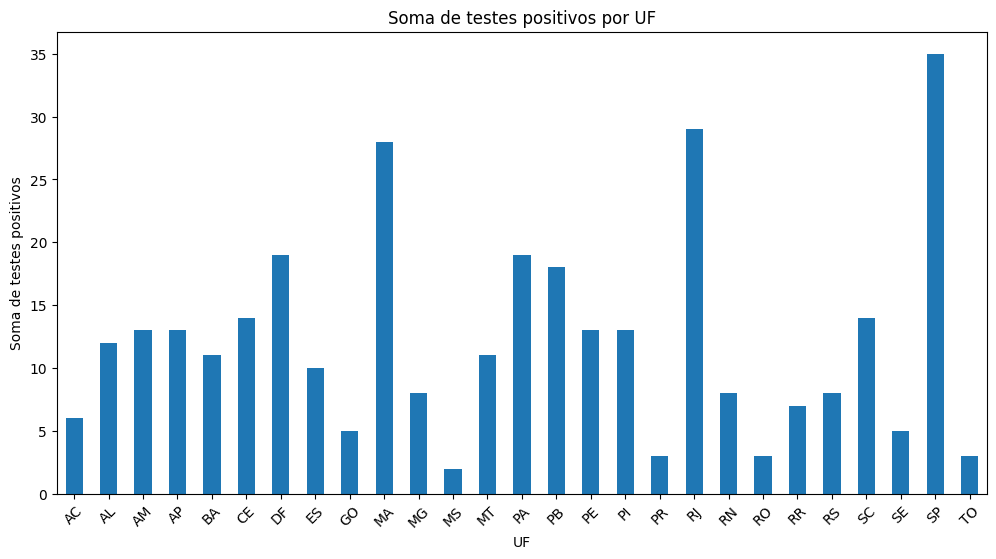

In [84]:
# Testes positivos por estado
plt.figure(figsize=(12, 6))

df_dados.groupby('uf')['teste_qualquer_sim'].sum().plot(kind='bar')

plt.xlabel('UF')
plt.ylabel('Soma de testes positivos')
plt.title('Soma de testes positivos por UF')
plt.xticks(rotation=45)

plt.show()

In [75]:
df_agrupado

,teste_qualquer_sim
uf,
AC,6
AL,12
AM,13
AP,13
BA,11
CE,14
DF,19
ES,10
GO,5


In [95]:
df_dados.shape

(52144, 23)